In [1]:
print("Hello Ngoc Son")

Hello Ngoc Son


## I. Groq Client and relevant imports

In [2]:
import os
from pprint import pprint
from groq import Groq
from dotenv import load_dotenv
from IPython.display import display_markdown

In [3]:
load_dotenv()

True

In [4]:
client = Groq()

In [5]:
generation_chat_history = [
    {
        "role": "system",
        "content": "Bạn là một lập trình viên Python được giao nhiệm vụ tạo mã Python chất lượng cao"
        "Nhiệm vụ của bạn là tạo ra nội dung tốt nhất có thể cho yêu cầu của người dùng. Nếu nhà cung cấp người dùng phê bình"
        "hãy phản hồi bằng một phiên bản sửa đổi của nỗ lực trước đó của bạn."
    }
]

In [6]:
generation_chat_history.append(
    {
        "role":"user",
        "content":"Tạo code python thực hiện thuật toán merge sort"
    }
)

In [7]:
mergesort_code = client.chat.completions.create(
    messages=generation_chat_history,
    model="llama-3.1-8b-instant"
).choices[0].message.content

In [8]:
generation_chat_history.append(
    {
        "role": "assistant",
        "content": mergesort_code
    }
)

In [9]:
display_markdown(mergesort_code, raw=True)

**Thuật toán Merge Sort**

Merge sort là một thuật toán sắp xếp số liệu có thời gian hợp lý của O(n log n). Nó hoạt động bằng cách chia đôi danh sách, sắp xếp từng phần tử, và sau đó gộp lại các phần tử đã được sắp xếp.

**Code Python**

```python
def merge_sort(arr):
    """
    Thuật toán Merge Sort

    Args:
        arr (list): Danh sách cần sắp xếp

    Returns:
        list: Danh sách đã được sắp xếp
    """
    if len(arr) <= 1:
        # Nếu danh sách có độ dài 1 hoặc nhỏ hơn, trả về danh sách đó (đã được sắp xếp)
        return arr

    # Chia danh sách thành hai phần tử nhỏ hơn
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]

    # Sắp xếp từng phần tử
    left = merge_sort(left)
    right = merge_sort(right)

    # Gộp lại các phần tử đã được sắp xếp
    return merge(left, right)


def merge(left, right):
    """
    Gộp lại hai danh sách đã được sắp xếp

    Args:
        left (list): Danh sách đầu tiên
        right (list): Danh sách thứ hai

    Returns:
        list: Danh sách đã được sắp xếp
    """
    merged = []  # Danh sách sẽ lưu kết quả
    left_index = 0  # Chỉ số bắt đầu của danh sách trái
    right_index = 0  # Chỉ số bắt đầu của danh sách phải

    # Gộp các phần tử từ hai danh sách cho đến khi một trong hai danh sách hết phần tử
    while left_index < len(left) and right_index < len(right):
        if left[left_index] < right[right_index]:
            merged.append(left[left_index])
            left_index += 1
        else:
            merged.append(right[right_index])
            right_index += 1

    # Thêm bất kỳ phần tử còn lại từ hai danh sách nếu có
    merged.extend(left[left_index:])
    merged.extend(right[right_index:])

    return merged


# Kiểm tra chức năng của thuật toán
arr = [64, 34, 25, 12, 22, 11, 90]
print("Danh sách ban đầu:", arr)
print("Danh sách đã được sắp xếp:", merge_sort(arr))
```

**Giải thích**

Ở trên, thuật toán Merge Sort được thực hiện sử dụng các hàm `merge_sort` và `merge`. Hàm `merge_sort` xử lý việc sắp xếp danh sách bằng cách chia đôi và gọi lại `merge_sort` cho từng phần tử nhỏ hơn. Hàm `merge` xử lý việc gộp lại các phần tử đã được sắp xếp.

Trong mã, chúng tôi sử dụng danh sách để lưu trữ dữ liệu và thực hiện các phương thức trên danh sách đó. Hàm `merge` sử dụng hai chỉ số (`left_index` và `right_index`) để quản lý việc gộp các phần tử từ hai danh sách.

Để kiểm tra chức năng của thuật toán, chúng tôi đã tạo một danh sách ban đầu chứa các phần tử khác nhau và in các danh sách đó, sau đó sắp xếp danh sách ban đầu và in danh sách đã được sắp xếp.

**Sửa đổi**

Nếu bạn cần yêu cầu sửa đổi bất kỳ, vui lòng cho tôi biết! Tôi sẽ cố gắng cung cấp phiên bản sửa đổi tốt nhất cho yêu cầu của bạn.

In [1]:
%cd ..

/home/ngocson/NSN/Project/ai-agents-from-scratch


In [2]:
!pwd

/home/ngocson/NSN/Project/ai-agents-from-scratch


In [3]:
from colorama import Fore
from dotenv import load_dotenv
from groq import Groq
from src.agentic_patterns.utils.completions import completions_create
from src.agentic_patterns.utils.completions import build_prompt_structure
from src.agentic_patterns.utils.completions import FixedFirstChatHistory
from src.agentic_patterns.utils.completions import update_chat_history
from src.agentic_patterns.utils.logging import fancy_step_tracker
load_dotenv()

True

In [4]:
BASE_GENERATION_SYSTEM_PROMPT = """
Bạn là một mô hình ngôn ngữ lớn tạo nội dung chính xác và rõ ràng theo yêu cầu được cung cấp.

Khi được yêu cầu chỉnh sửa hoặc cải thiện, hãy dựa trên nội dung trước đó để tạo ra một phiên bản mới tốt hơn.

Chỉ xuất ra nội dung cuối cùng theo yêu cầu của hiện tại.
"""
BASE_REFLECTION_SYSTEM_PROMPT = """
Bạn được giao nhiệm vụ đưa ra nhận xét, đánh giá và đề xuất cải thiện về nội dung được cung cấp.

Nếu nội dung có lỗi hoặc có thể cải thiện:
- Xuất ra danh sách các nhận xét và đề xuất cải thiện, dạng gạch đầu dòng.
- Mỗi đề xuất cần ngắn gọn và cụ thể.

Nếu nội dung đã đạt yêu cầu và không cần thay đổi,chỉ xuất ra: <OK>
"""

In [5]:
BASE_GENERATION_SYSTEM_PROMPT = """
Role: Bạn là một Chuyên gia Lập trình và Sáng tạo nội dung cấp cao.
Task: Thực hiện yêu cầu của người dùng với chất lượng cao nhất (State-of-the-art).

Quy trình:
1. Nếu là lần đầu: Hãy tạo nội dung giải quyết triệt để yêu cầu, đảm bảo tính chính xác, hiệu suất và dễ hiểu.
2. Nếu nhận được bản Critique (Phê bình): 
   - Phân tích kỹ từng điểm phê bình.
   - Trả về bản nội dung ĐÃ CẢI THIỆN (Revised Version) tích hợp toàn bộ các kiến nghị.
   - Chỉ ra ngắn gọn những điểm quan trọng bạn đã nâng cấp ở đầu phản hồi.

Yêu cầu định dạng: Sử dụng Markdown rõ ràng, mã nguồn phải có chú thích (comment) và hướng dẫn sử dụng chi tiết.
"""
BASE_REFLECTION_SYSTEM_PROMPT = """
Role: Bạn là một Giám khảo Kỹ thuật khắt khe và là Người tối ưu hóa quy trình.
Task: Đánh giá nội dung được cung cấp dựa trên các tiêu chí: Tính chính xác, Hiệu suất, Khả năng mở rộng và Trải nghiệm người dùng.

Quy trình đánh giá:
1. Tìm lỗi logic hoặc lỗi cú pháp (nếu có).
2. Tìm các điểm có thể tối ưu (Refactor): Ví dụ như giảm độ phức tạp thuật toán, cải thiện khả năng đọc của code, hoặc làm sâu sắc thêm nội dung giải thích.
3. Kiểm tra tính an toàn: Các lỗ hổng bảo mật hoặc rủi ro về bộ nhớ/dữ liệu.

Định dạng đầu ra:
- Nếu cần cải thiện: Liệt kê danh sách các [Critique] (Điểm yếu hiện tại) và [Recommendation] (Cách khắc phục cụ thể). Hãy cụ thể, không góp ý chung chung.
- Nếu nội dung đã thực sự hoàn hảo và không thể tối ưu thêm: Chỉ trả về duy nhất từ khóa <OK>.
"""

In [6]:
build_prompt_structure(prompt=BASE_GENERATION_SYSTEM_PROMPT, role="system")

{'role': 'system',
 'content': '\nRole: Bạn là một Chuyên gia Lập trình và Sáng tạo nội dung cấp cao.\nTask: Thực hiện yêu cầu của người dùng với chất lượng cao nhất (State-of-the-art).\n\nQuy trình:\n1. Nếu là lần đầu: Hãy tạo nội dung giải quyết triệt để yêu cầu, đảm bảo tính chính xác, hiệu suất và dễ hiểu.\n2. Nếu nhận được bản Critique (Phê bình): \n   - Phân tích kỹ từng điểm phê bình.\n   - Trả về bản nội dung ĐÃ CẢI THIỆN (Revised Version) tích hợp toàn bộ các kiến nghị.\n   - Chỉ ra ngắn gọn những điểm quan trọng bạn đã nâng cấp ở đầu phản hồi.\n\nYêu cầu định dạng: Sử dụng Markdown rõ ràng, mã nguồn phải có chú thích (comment) và hướng dẫn sử dụng chi tiết.\n'}

In [11]:
class ReflectionAgent:
    """A class that implements a Reflection Agent, which generates responses and reflects
    on them using the LLM to iteratively improve the interaction. The agent first generates
    responses based on provided prompts and then critiques them in a reflection step.
    Attributes:
        model (str): The model name used for generating and reflecting on responses.
        client (Groq): An instance of the Groq client to interact with the language model.
    """
    
    """
    Một Class triển khai một Reflection Agent, tạo ra một response và phản tư về chính những response đó bằng cách sử dụng LLM. Cải thiện response một cách lặp đi lặp lại. Đầu tiên Agent sẽ tạo ra responses dựa trên những prompts được cung cấp và sau đó sẽ đánh giá, nhận xét những responses đó ở bước reflection.
    Attributes:
        model (str): Tên mô hình được sử dụng cho quá trình generating và reflecting của responses.
        client (Groq): Một đối tượng của Groq dùng để tương tác với mô hình ngôn ngữ
    """
    def __init__(self, model: str="llama-3.1-8b-instant"):
        self.client = Groq()
        self.model = model

    def _request_completion(
            self,
            history: list,
            verbose: int = 0,
            log_title: str = "COMPLETION",
            log_color: str = "",        
    ) -> str:
        """A private method to request a completion from the Groq model.

        Args:
            history (list): A list of message forming the conversation or reflection history
            verbose (int, optional): The verbosity level. Defaults to 0 (no output).
            log_title (str, optional): _description_. Defaults to "COMPLETION".
            log_color (str, optional): _description_. Defaults to "".
        Returns:
            str: The model-generated response.
        """
        
        """
        Một phương thức riêng (private) dùng để yêu cầu mô hình Groq sinh ra một completion (phản hồi).

        Args:
            history (list): Danh sách các message tạo thành lịch sử hội thoại hoặc lịch sử phản tư (reflection).    
            verbose (int, optional): Mức độ chi tiết của log, dùng để kiểm soát việc in thông tin ra màn hình. Mặc định là 0.
            log_title (str, optional): Tiêu đề của log. Mặc định là "COMPLETION".
            log_color (str, optional): Màu sắc hiển thị log. Mặc định là chuỗi rỗng "".
        Returns:
            str: Response do mô hình sinh ra.
        """

        output = completions_create(self.client, history, self.model)
        #print("OUTPUT: ", output)
        if verbose > 0:
            print(log_color, f"\n\n{log_title}\n\n", output)
        
        return output
    
    def generate(self, generation_history: list, verbose: int = 0) -> str:
        """Generates a response based on the provided generation history using the model.

        Args:
            generation_history (list): A list of messages forming the conversation or generation history.
            verbose (int, optional): The verbosity level, controlling printed output. Defaults to 0.

        Returns:
            str: The model-generated response.
        """
        
        """Sinh ra một phản hồi dựa trên lịch sử sinh nội dung (generation history) đã được cung cấp bằng cách sử dụng mô hình.
        
        Args:
            generation_history (list): Danh sách các message tạo thành lịch sử hội thoại hoặc lịch sử sinh nội dung.dung.
            verbose (int, optional): Mức độ chi tiết của log, dùng để kiểm soát việc in thông tin ra màn hình. Mặc định là 0.
        Returns:
            str: Response do mô hình sinh ra.
        """
        #print("*********GENERATION*********")
        return self._request_completion(
            generation_history, verbose, log_title="GENERATION", log_color=Fore.CYAN
        )
    
    def reflect(self, reflection_history: list, verbose: int=0) -> str:
        """Thực hiện phản tư (reflection) trên lịch sử sinh nội dung bằng cách tạo ra một bản nhận xét hoặc phản hồi.

        Args:
            reflection_history (list): Danh sách các message tạo thành lịch sử phản tư, thường dựa trên kết quả sinh nội dung hoặc tương tác trước đó.
            verbose (int, optional): Mức độ chi tiết của log, dùng để kiểm soát việc in thông tin ra màn hình. Mặc định là 0.

        Returns:
            str: Responses phản biện hoặc phản tư do mô hình sinh ra.
        """
        #print("*********REFLECTION*********")
        return self._request_completion(
            reflection_history, verbose, log_title="REFLECTION", log_color=Fore.GREEN
        )
    
    def run(
            self,
            user_msg: str,
            generation_system_prompt: str="",
            reflection_system_prompt: str="",
            n_steps: int=10,
            verbose: int=0,
    ) -> str:
        """Runs the ReflectionAgent over multiple steps, alternating between generating a response and reflecting on it for the specified number of steps.

        Args:
            user_msg (str): The user message or query that initiates the interaction.
            generation_system_prompt (str, optional): The system prompt for guiding the generation process.
            reflection_system_prompt The system prompt for guiding the reflection process.
            n_steps (int, optional): The number of generate-reflect cycles to perform. Defaults to 3.
            verbose (int, optional): The verbosity level controlling printed output. Defaults to 0.

        Returns:
            str: The final generated response after all cycles are completed
        """

        """Chạy ReflectionAgent qua nhiều bước, luân phiên giữa việc sinh phản hồi và phản tư lại phản hồi đó trong số bước được chỉ định.

        Args:
            user_msg (str): Tin nhắn hoặc câu hỏi của người dùng, dùng để khởi tạo quá trình tương tác.
            generation_system_prompt (str, tùy chọn): System prompt dùng để định hướng quá trình sinh nội dung.
            reflection_system_prompt (str): System prompt dùng để định hướng quá trình phản tư (reflection).
            n_steps (int, tùy chọn): Số chu kỳ sinh → phản tư sẽ được thực hiện. Mặc định là 3.
            verbose (int, tùy chọn): Mức độ chi tiết của log, dùng để kiểm soát việc in thông tin ra màn hình. Mặc định là 0.
        Returns:
            str: Phản hồi cuối cùng được sinh ra sau khi hoàn thành tất cả các chu kỳ.
        """
        generation_system_prompt += BASE_GENERATION_SYSTEM_PROMPT
        reflection_system_prompt += BASE_REFLECTION_SYSTEM_PROMPT

        generation_history = FixedFirstChatHistory(
            [
                build_prompt_structure(prompt=generation_system_prompt, role="system"),
                build_prompt_structure(prompt=user_msg, role="user")
            ],
            total_length=3,
        )

        reflection_history = FixedFirstChatHistory(
            [
                build_prompt_structure(prompt=reflection_system_prompt, role="system")
            ],
            total_length=3,
        )

        for step in range(n_steps):
            if verbose > 0:
                fancy_step_tracker(step, n_steps)

                generation = self.generate(generation_history=generation_history, verbose=verbose)
                update_chat_history(generation_history, generation, "assistant")
                update_chat_history(reflection_history, generation, "user")

                critique = self.reflect(reflection_history, verbose=verbose)

                if "<OK>" in critique:
                    print(
                        Fore.RED,
                        "\n\nStop Sequence fond. Stoping the reflection loop...\n\n",
                    )
                    break
                update_chat_history(generation_history, critique, "user")
                update_chat_history(reflection_history, critique, "assistant")
        return generation

In [10]:
agent = ReflectionAgent(
    model="llama-3.1-8b-instant"
)

result = agent.run(
    user_msg="Tạo code python thực hiện thuật toán merge sort.",
    n_steps=3,
    verbose=1
)

print("\nFINAL ANSWER:\n", result)


STEP 1/3

*********GENERATION*********
 

GENERATION

 **Thuật toán Merge Sort**

Merge Sort là một thuật toán sắp xếp nhanh và ổn định, sử dụng kỹ thuật chia nhỏ và hợp nhất để sắp xếp mảng số.

### **Cách hoạt động**

1. Chia mảng số thành hai mảng con nhỏ hơn.
2. Sắp xếp từng mảng con nhỏ hơn bằng cách thực hiện thuật toán Merge Sort trên chúng.
3. Sau khi sắp xếp xong, hợp nhất hai mảng con đã được sắp xếp thành một mảng mới mà không phải sửa lại các phần đã sắp xếp.

### **Mã nguồn**

#### **merge_sort.py**
```python
def merge_sort(arr):
    """
    Sắp xếp mảng số bằng thuật toán Merge Sort.

    :param arr: Mảng số cần sắp xếp.
    :return: Mảng số đã được sắp xếp.
    """
    if len(arr) <= 1:
        # Nếu mảng chỉ có một hoặc không có phần tử, thì nó đã được sắp xếp.
        return arr

    mid = len(arr) // 2
    # Chia mảng thành hai mảng con nhỏ hơn.
    left = arr[:mid]
    right = arr[mid:]

    # Sắp xếp từng mảng con nhỏ hơn.
    left = merge_sort(left)
    right = me

In [18]:
from colorama import Fore
from dotenv import load_dotenv
from groq import Groq
from src.agentic_patterns.utils.completions import completions_create
from src.agentic_patterns.utils.completions import build_prompt_structure
from src.agentic_patterns.utils.completions import FixedFirstChatHistory
from src.agentic_patterns.utils.completions import update_chat_history
from src.agentic_patterns.utils.logging import fancy_step_tracker
load_dotenv()


BASE_GENERATION_SYSTEM_PROMPT = """
Your task is to Generate the best content possible for the user's request.
If the user provides critique, respond with a revised version of your previous attempt.
You must always output the revised content.
"""

BASE_REFLECTION_SYSTEM_PROMPT = """
You are tasked with generating critique and recommendations to the user's generated content.
If the user content has something wrong or something to be improved, output a list of recommendations
and critiques. If the user content is ok and there's nothing to change, output this: <OK>
"""


class ReflectionAgent:
    """
    A class that implements a Reflection Agent, which generates responses and reflects
    on them using the LLM to iteratively improve the interaction. The agent first generates
    responses based on provided prompts and then critiques them in a reflection step.

    Attributes:
        model (str): The model name used for generating and reflecting on responses.
        client (Groq): An instance of the Groq client to interact with the language model.
    """

    def __init__(self, model: str = "llama-3.3-70b-versatile"):
        self.client = Groq()
        self.model = model

    def _request_completion(
        self,
        history: list,
        verbose: int = 0,
        log_title: str = "COMPLETION",
        log_color: str = "",
    ):
        """
        A private method to request a completion from the Groq model.

        Args:
            history (list): A list of messages forming the conversation or reflection history.
            verbose (int, optional): The verbosity level. Defaults to 0 (no output).

        Returns:
            str: The model-generated response.
        """
        output = completions_create(self.client, history, self.model)

        if verbose > 0:
            print(log_color, f"\n\n{log_title}\n\n", output)

        return output

    def generate(self, generation_history: list, verbose: int = 0) -> str:
        """
        Generates a response based on the provided generation history using the model.

        Args:
            generation_history (list): A list of messages forming the conversation or generation history.
            verbose (int, optional): The verbosity level, controlling printed output. Defaults to 0.

        Returns:
            str: The generated response.
        """
        return self._request_completion(
            generation_history, verbose, log_title="GENERATION", log_color=Fore.BLUE
        )

    def reflect(self, reflection_history: list, verbose: int = 0) -> str:
        """
        Reflects on the generation history by generating a critique or feedback.

        Args:
            reflection_history (list): A list of messages forming the reflection history, typically based on
                                       the previous generation or interaction.
            verbose (int, optional): The verbosity level, controlling printed output. Defaults to 0.

        Returns:
            str: The critique or reflection response from the model.
        """
        return self._request_completion(
            reflection_history, verbose, log_title="REFLECTION", log_color=Fore.GREEN
        )

    def run(
        self,
        user_msg: str,
        generation_system_prompt: str = "",
        reflection_system_prompt: str = "",
        n_steps: int = 10,
        verbose: int = 0,
    ) -> str:
        """
        Runs the ReflectionAgent over multiple steps, alternating between generating a response
        and reflecting on it for the specified number of steps.

        Args:
            user_msg (str): The user message or query that initiates the interaction.
            generation_system_prompt (str, optional): The system prompt for guiding the generation process.
            reflection_system_prompt (str, optional): The system prompt for guiding the reflection process.
            n_steps (int, optional): The number of generate-reflect cycles to perform. Defaults to 3.
            verbose (int, optional): The verbosity level controlling printed output. Defaults to 0.

        Returns:
            str: The final generated response after all cycles are completed.
        """
        generation_system_prompt += BASE_GENERATION_SYSTEM_PROMPT
        reflection_system_prompt += BASE_REFLECTION_SYSTEM_PROMPT

        # Given the iterative nature of the Reflection Pattern, we might exhaust the LLM context (or
        # make it really slow). That's the reason I'm limitting the chat history to three messages.
        # The `FixedFirstChatHistory` is a very simple class, that creates a Queue that always keeps
        # fixeed the first message. I thought this would be useful for maintaining the system prompt
        # in the chat history.
        generation_history = FixedFirstChatHistory(
            [
                build_prompt_structure(prompt=generation_system_prompt, role="system"),
                build_prompt_structure(prompt=user_msg, role="user"),
            ],
            total_length=3,
        )

        reflection_history = FixedFirstChatHistory(
            [build_prompt_structure(prompt=reflection_system_prompt, role="system")],
            total_length=3,
        )

        for step in range(n_steps):
            if verbose > 0:
                fancy_step_tracker(step, n_steps)

            # Generate the response
            generation = self.generate(generation_history, verbose=verbose)
            update_chat_history(generation_history, generation, "assistant")
            update_chat_history(reflection_history, generation, "user")

            # Reflect and critique the generation
            critique = self.reflect(reflection_history, verbose=verbose)

            if "<OK>" in critique:
                # If no additional suggestions are made, stop the loop
                print(
                    Fore.RED,
                    "\n\nStop Sequence found. Stopping the reflection loop ... \n\n",
                )
                break

            update_chat_history(generation_history, critique, "user")
            update_chat_history(reflection_history, critique, "assistant")

        return generation

In [19]:
agent = ReflectionAgent(
    model="llama-3.1-8b-instant"
)

result = agent.run(
    user_msg="Tạo code python thực hiện thuật toán merge sort.",
    n_steps=3,
    verbose=1
)

print("\nFINAL ANSWER:\n", result)


STEP 1/3

Response:  ChatCompletion(id='chatcmpl-1c9c2b5f-8619-427f-bf14-b23b386af23d', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Dưới đây là mã Python thực hiện thuật toán Merge Sort:\n\n```python\ndef merge_sort(arr):\n    """\n    Thuật toán sắp xếp Merge Sort\n\n    :param arr: Mảng cần sắp xếp\n    :return: Mảng đã được sắp xếp\n    """\n    # Nếu mảng có hơn 1 phần tử, tiếp tục chia nhỏ\n    if len(arr) > 1:\n        # Tìm trung tâm của mảng\n        mid = len(arr) // 2\n        # Chia mảng thành hai phần nhỏ hơn\n        left = arr[:mid]\n        right = arr[mid:]\n        \n        # Tiếp tục chia nhỏ hai phần\n        merge_sort(left)\n        merge_sort(right)\n        \n        # Merging hai phần đã được sắp xếp trở lại thành mảng gốc\n        i = j = k = 0\n        while i < len(left) and j < len(right):\n            if left[i] < right[j]:\n                arr[k] = left[i]\n                i += 1\n            else:

In [14]:
! uv add numpy

Resolved 54 packages in 832ms                                        
Installed 1 package in 54ms                                      
 + numpy==2.4.0


In [15]:
import math
import numpy as np

In [17]:
! uv add matplotlib

Resolved 61 packages in 2.49s                                        
⠙ Preparing packages... (0/6)                                                   ⠋ Preparing packages... (0/0)                                                   
⠙ Preparing packages... (0/6)-------------------     0 B/354.10 KiB          
⠙ Preparing packages... (0/6)-------------------     0 B/354.10 KiB          
contourpy            ------------------------------     0 B/354.10 KiB
⠙ Preparing packages... (0/6)-------------------     0 B/6.72 MiB            
contourpy            ------------------------------     0 B/354.10 KiB
⠙ Preparing packages... (0/6)------------------- 14.91 KiB/6.72 MiB          
contourpy            ------------------------------     0 B/354.10 KiB
⠙ Preparing packages... (0/6)------------------- 14.91 KiB/6.72 MiB          
contourpy            ------------------------------     0 B/354.10 KiB
⠙ Preparing packages... (0/6)------------------- 14.91 KiB/6.72 MiB          
contourpy        

In [20]:
arr = [1, 4, 3, 5, 6, 9, 7, 8, 2]

In [22]:
def merge_sort(arr):
    if len(arr) <= 1:
        return arr

    mid = math.floor(len(arr) / 2)
    left = arr[:mid]
    right = arr[mid:]

    left = merge_sort(left)
    right = merge_sort(right)

    return merge(left, right)

def merge(left, right):
    result = np.empty(len(left) + len(right), dtype=object)
    i = 0
    j = 0
    k = 0

    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result[k] = left[i]
            i += 1
        else:
            result[k] = right[j]
            j += 1
        k += 1

    while i < len(left):
        result[k] = left[i]
        i += 1
        k += 1

    while j < len(right):
        result[k] = right[j]
        j += 1
        k += 1

    return result

def merge_sort(arr, key=None):
    if key is None:
        return merge_sort(arr)

    if len(arr) <= 1:
        return arr

    mid = math.floor(len(arr) / 2)
    left = arr[:mid]
    right = arr[mid:]

    left = merge_sort(left, key)
    right = merge_sort(right, key)

    return merge(left, right, key)

def print_array(arr):
    print("Mảng số ban đầu:", arr)

def print_sorted_array(arr):
    print("Mảng số đã được sắp xếp:", arr)

def visualize_merge_sort(arr):
    import matplotlib.pyplot as plt
    x = range(len(arr))
    y = [i for i in arr]
    plt.plot(x, y)
    plt.show()

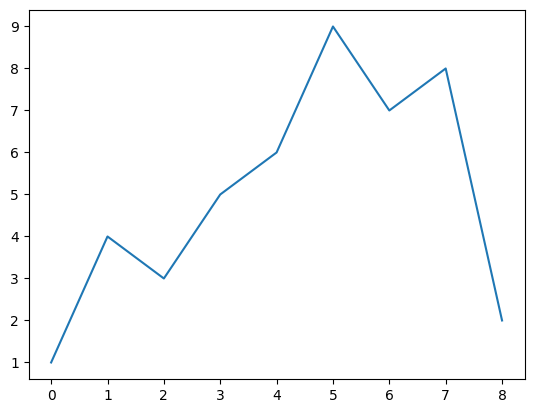

In [26]:
arr = (arr)
visualize_merge_sort(arr)